# TITANIC

In [8]:
import pandas as pd
import numpy as np

In [68]:
d = pd.read_csv("C:\\Users\\Jayesh's\\Desktop\\Pyhton_Notebooks\\datasets\\titanic\\train.csv")
d.head(10)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [69]:
d.columns
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
d.drop("Cabin",axis = 1, inplace=True)
#d.drop("Ticket",axis = 1, inplace=True)
#d.drop("Fare",axis = 1, inplace=True)
#d.drop("PassengerId",axis = 1, inplace=True)
d.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [72]:
missing_age = pd.isnull(d['Age'])
d[missing_age].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [73]:
m_a_f = d[missing_age]['Sex'] == 'female'
m_a_m = d[missing_age]['Sex'] == 'male'
print(m_a_f.sum())
print(m_a_m.sum())

53
124


In [74]:
#title extraction
d['Title'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
d['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [75]:
#Grouping titles
d['Title'] = d['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')   
d['Title'] = d['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
d['Title'] = d['Title'].replace('Mlle', 'Miss')
d['Title'] = d['Title'].replace('Ms', 'Miss')
d['Title'] = d['Title'].replace('Mme', 'Mrs')
d['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Royal'], dtype=object)

In [76]:
#Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
d['Title'] = d['Title'].map(title_mapping)
d['Title'] = d['Title'].fillna(0)
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [77]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
d['AgeGroup'] = pd.cut(d["Age"], bins, labels = labels)

In [78]:
mr_age = d[d["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = d[d["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = d[d["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = d[d["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = d[d["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = d[d["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(d["AgeGroup"])):
    if d["AgeGroup"][x] == "Unknown":
        d["AgeGroup"][x] = age_title_mapping[d["Title"][x]]

In [79]:
mean_ages = d.groupby(['Title'])['Age'].mean()

def remove_na_ages(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Title']]
    else:
        return row['Age']
d['Age'] =d.apply(remove_na_ages, axis=1)

In [80]:
d[missing_age].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,Q,1,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,32.368090,0,0,244373,13.0000,S,1,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,35.788991,0,0,2649,7.2250,C,3,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,32.368090,0,0,2631,7.2250,C,1,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.845638,0,0,330959,7.8792,Q,2,NaN
29,30,0,3,"Todoroff, Mr. Lalio",male,32.368090,0,0,349216,7.8958,S,1,NaN
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.788991,1,0,PC 17569,146.5208,C,3,NaN
32,33,1,3,"Glynn, Miss. Mary Agatha",female,21.845638,0,0,335677,7.7500,Q,2,NaN
36,37,1,3,"Mamee, Mr. Hanna",male,32.368090,0,0,2677,7.2292,C,1,NaN
42,43,0,3,"Kraeff, Mr. Theodor",male,32.368090,0,0,349253,7.8958,C,1,NaN


In [81]:
d.drop("AgeGroup",axis = 1, inplace=True)

In [82]:
missing_ports = d[d['Embarked'].isnull()]
missing_ports

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,3


In [83]:
d['Embarked'].fillna('C',inplace=True)

In [84]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
cat_mask=(d.dtypes=='object')
cat_col=d.columns[cat_mask].tolist()
print(d[cat_col].head())
le=LabelEncoder()
d[cat_col]=d[cat_col].apply(lambda x:le.fit_transform(x))
print(d[cat_col].head())

                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Embarked  
0         A/5 21171        S  
1          PC 17599        C  
2  STON/O2. 3101282        S  
3            113803        S  
4            373450        S  
   Name  Sex  Ticket  Embarked
0   108    1     523         2
1   190    0     596         0
2   353    0     669         2
3   272    0      49         2
4    15    1     472         2


In [86]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,108,1,22.0,1,0,523,7.2500,2,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,0,3
2,3,1,3,353,0,26.0,0,0,669,7.9250,2,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,2,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,2,1


In [87]:
from sklearn.model_selection import train_test_split as t_t_s
X = d.drop(["Survived"],axis = 1)
y = d["Survived"]
X_train,X_test,y_train,y_test=t_t_s(X,y,test_size=0.43,random_state=42)


# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier as dtc
dt=dtc()
dt.fit(X_train,y_train)
predictions=dt.predict(X_test)
dt.score(X_test,y_test)

0.78125

# XGBoost

In [89]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=15, seed=120)
xg_cl.fit(X_train,y_train)
preds = xg_cl.predict(X_test)
# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy:  ", (accuracy))

accuracy:   0.8151041666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
titanic = xgb.DMatrix(data=X,label=y)
tuned_params = {"objective":"reg:linear",'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5}
tuned_cv_results_rmse = xgb.cv(dtrain=titanic, params=tuned_params, nfold=4, num_boost_round=200, metrics="rmse",as_pandas=True, seed=123)
print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Tuned rmse: 0.371437


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
parameter_gridsearch = {
                 'max_depth' : [3, 4],  #depth of each decision tree
                 'n_estimators': [50, 20],  #count of decision tree
                 'max_features': ['sqrt', 'auto', 'log2'],      
                 'min_samples_split': [2],      
                 'min_samples_leaf': [1, 3, 4],
                 'bootstrap': [True, False],
                 }
randomforest = RandomForestClassifier()
crossvalidation = StratifiedKFold(y , n_folds=5)

gridsearch = GridSearchCV(randomforest,             #grid search for algorithm optimization
                               scoring='accuracy',
                               param_grid=parameter_gridsearch,
                               cv=crossvalidation)


gridsearch.fit(X,y) 
model = gridsearch
parameters = gridsearch.best_params_
print('Best Score:{}'.format(gridsearch.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Best Score:0.8305274971941639


# Knn Neighbors

In [61]:
from sklearn.preprocessing import StandardScaler as ss
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.pipeline import Pipeline as pipe

scaler = ss()
knn = kn(n_neighbors = 6)

steps = [("scale",scaler),
         ("clf", knn)]

pipeline = pipe(steps)
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.8046875

# PCA

[[108.          22.        ]
 [190.          38.        ]
 [353.          26.        ]
 [272.          35.        ]
 [ 15.          35.        ]
 [554.          32.36809045]
 [515.          54.        ]
 [624.           2.        ]
 [412.          27.        ]
 [576.          14.        ]]


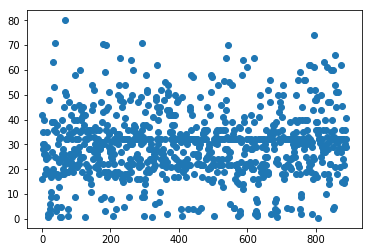

In [136]:
d_t = d[['Name','Age']]
d_t = d_t.values
print(d_t[0:10,:])

import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(d_t[:,0],d_t[:,1])
plt.show()

In [137]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(d_t[:,0], d_t[:,1])
print(correlation)

0.056883441417037814


[[-337.0213778    -6.76815319]
 [-254.9746457     8.99045561]
 [ -92.01066697   -3.48919328]
 [-172.98382965    5.7491467 ]
 [-429.98271672    6.50548487]
 [ 109.00720357    2.28733663]
 [  70.07103409   24.03392755]
 [ 178.91752866  -28.28662882]
 [ -33.00797952   -2.66283167]
 [ 130.95305193  -16.14541919]]


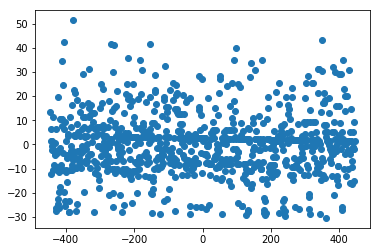

In [138]:
from sklearn.decomposition import PCA
model = PCA()

model.fit(d_t)

transformed = model.transform(d_t)

print(transformed[:10,:])

plt.scatter(transformed[:,0], transformed[:,1])
plt.show()

In [139]:
correlation, p_value = pearsonr(transformed[:,0], transformed[:,1])
print(correlation)

4.7921210731477644e-18
